In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
file_path = '~/aiffel/AIFFEL_repo/netflix_titles.csv'
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [86]:
data = data.rename(columns = {'listed_in': 'genre'})
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [137]:
data = data.dropna(subset=['director'])

In [138]:
data_two = data[['director','genre']]
data_two

,director,genre
0,Kirsten Johnson,Documentaries
2,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act..."
5,Mike Flanagan,"TV Dramas, TV Horror, TV Mysteries"
6,"Robert Cullen, José Luis Ucha",Children & Family Movies
7,Haile Gerima,"Dramas, Independent Movies, International Movies"
...,...,...
8801,Majid Al Ansari,"Dramas, International Movies, Thrillers"
8802,David Fincher,"Cult Movies, Dramas, Thrillers"
8804,Ruben Fleischer,"Comedies, Horror Movies"
8805,Peter Hewitt,"Children & Family Movies, Comedies"


In [139]:
df_str = data_two.astype('string') # 문자열 타입으로 변경
df_str

,director,genre
0,Kirsten Johnson,Documentaries
2,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act..."
5,Mike Flanagan,"TV Dramas, TV Horror, TV Mysteries"
6,"Robert Cullen, José Luis Ucha",Children & Family Movies
7,Haile Gerima,"Dramas, Independent Movies, International Movies"
...,...,...
8801,Majid Al Ansari,"Dramas, International Movies, Thrillers"
8802,David Fincher,"Cult Movies, Dramas, Thrillers"
8804,Ruben Fleischer,"Comedies, Horror Movies"
8805,Peter Hewitt,"Children & Family Movies, Comedies"


In [140]:
df_str["director"] = df_str["director"].str.replace(" ", "") 
df_str["genre"] = df_str["genre"].str.replace(" ", "")
df_str

,director,genre
0,KirstenJohnson,Documentaries
2,JulienLeclercq,"CrimeTVShows,InternationalTVShows,TVAction&Adv..."
5,MikeFlanagan,"TVDramas,TVHorror,TVMysteries"
6,"RobertCullen,JoséLuisUcha",Children&FamilyMovies
7,HaileGerima,"Dramas,IndependentMovies,InternationalMovies"
...,...,...
8801,MajidAlAnsari,"Dramas,InternationalMovies,Thrillers"
8802,DavidFincher,"CultMovies,Dramas,Thrillers"
8804,RubenFleischer,"Comedies,HorrorMovies"
8805,PeterHewitt,"Children&FamilyMovies,Comedies"


In [154]:
director_counts = df_str.groupby('director',as_index=False).agg(director_count = ('director','count')).sort_values('director_count', ascending = False )
director_count = director_counts[0:12]
director_count

,director,director_count
3392,RajivChilaka,19
3443,"RaúlCampos,JanSuter",18
4046,SuhasKadav,16
2598,MarcusRaboy,16
1790,JayKaras,14
685,CathyGarcia-Molina,13
1787,JayChapman,12
4480,YoussefChahine,12
2671,MartinScorsese,12
4020,StevenSpielberg,11


<AxesSubplot:xlabel='director_count', ylabel='director'>

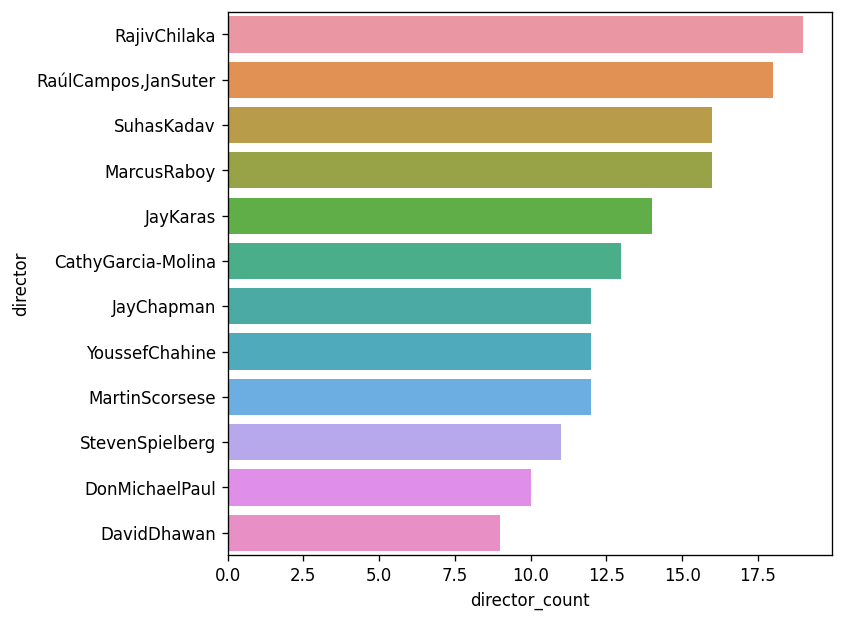

In [155]:
plt.rcParams.update({'font.family' : 'Malgun Gothic',
                     'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

sns.barplot(data = director_count, x='director_count', y='director') 

In [172]:
df_director = df_str.query("director == 'RajivChilaka' | director == 'RaúlCampos,JanSuter' | director == 'SuhasKadav' | director == 'MarcusRaboy' | director == 'JayKaras' | director == 'CathyGarcia-Molina' | director == 'JayChapman' | director == 'YoussefChahine' | director == 'MartinScorsese' | director == 'RajivChilaka' | director == 'StevenSpielberg' | director == 'DonMichaelPaul' | director == 'DavidDhawan'").sort_values('genre', ascending = True)
df_director['genre'].value_counts()

Stand-UpComedy                                           57
Children&FamilyMovies                                    24
Children&FamilyMovies,Comedies                            6
ClassicMovies,Dramas,InternationalMovies                  6
Dramas,InternationalMovies,RomanticMovies                 5
Dramas                                                    5
Comedies,InternationalMovies,RomanticMovies               5
Comedies,Dramas,InternationalMovies                       5
Comedies,InternationalMovies,Music&Musicals               3
Action&Adventure,Children&FamilyMovies,ClassicMovies      3
ClassicMovies,Dramas,IndependentMovies                    3
Action&Adventure                                          3
Dramas,InternationalMovies                                3
Children&FamilyMovies,Music&Musicals                      3
Action&Adventure,Dramas                                   2
Children&FamilyMovies,Dramas                              2
Children&FamilyMovies,Comedies,Music&Mus

In [173]:
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Comedies','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='ClassicMovies,Dramas,InternationalMovies','Dramas',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Dramas,InternationalMovies,RomanticMovies','Romance',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Comedies,InternationalMovies,RomanticMovies','RomanticComedies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Comedies,Dramas,InternationalMovies','Comedies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Comedies,InternationalMovies,Music&Musicals','Comedies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Children&FamilyMovies,ClassicMovies','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='ClassicMovies,Dramas,IndependentMovies','Dramas',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Dramas,InternationalMovies','Dramas',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Music&Musicals','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Dramas','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Dramas','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Comedies,Music&Musicals ','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,ClassicMovies,Dramas ','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='ClassicMovies,Dramas','Dramas',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='InternationalMovies,RomanticMovies','Romance',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Documentaries,Music&Musicals','Documentaries',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Comedies,InternationalMovies,Sci-Fi&Fantasy','SF',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Comedies,SportsMovies','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='ClassicMovies,Dramas,SportsMovies','Dramas',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Sci-Fi&Fantasy','SF',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Comedies,HorrorMovies,Sci-Fi&Fantasy','SF',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,HorrorMovies','Horror',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='ClassicMovies,Comedies,Dramas','Comedies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Comedies,InternationalMovies','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Comedies,Dramas','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Comedies','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Dramas,Thrillers','Thrillers',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Music&Musicals,Stand-UpComedy','Stand-UpComedy',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Children&FamilyMovies,Sci-Fi&Fantasy','SF',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Stand-UpComedy&TalkShows,TVComedies ','Stand-UpComedy',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,Comedies,HorrorMovies','Horror',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,SportsMovies','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Action&Adventure,ClassicMovies,Dramas','Action&Adventure',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Children&FamilyMovies,Comedies,Music&Musicals','Children&FamilyMovies',df_director['genre'])
df_director['genre'] = np.where(df_director['genre'] =='Stand-UpComedy&TalkShows,TVComedies','Stand-UpComedy',df_director['genre'])
df_director

,director,genre
808,DonMichaelPaul,Action&Adventure
1133,DonMichaelPaul,Action&Adventure
4539,DonMichaelPaul,Action&Adventure
7073,StevenSpielberg,Action&Adventure
7072,StevenSpielberg,Action&Adventure
...,...,...
5066,"RaúlCampos,JanSuter",Stand-UpComedy
5176,"RaúlCampos,JanSuter",Stand-UpComedy
4222,JayChapman,Stand-UpComedy
2507,MarcusRaboy,Stand-UpComedy


In [209]:
df_director = df_director.sort_values('director', ascending = True)
df_director

,director,genre
4076,CathyGarcia-Molina,Romance
1682,CathyGarcia-Molina,Comedies
1497,CathyGarcia-Molina,Romance
8789,CathyGarcia-Molina,Comedies
4073,CathyGarcia-Molina,Comedies
...,...,...
2373,YoussefChahine,Action&Adventure
2376,YoussefChahine,Dramas
2369,YoussefChahine,Dramas
2460,YoussefChahine,Romance


In [185]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 4076 to 2366
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  162 non-null    string
 1   genre     162 non-null    object
dtypes: object(1), string(1)
memory usage: 3.8+ KB


In [186]:
df_director = df_director.astype('object')

In [187]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 4076 to 2366
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  162 non-null    object
 1   genre     162 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [188]:
onehot_df = pd.get_dummies(df_director) # 원핫인코딩
onehot_df

,director_CathyGarcia-Molina,director_DavidDhawan,director_DonMichaelPaul,director_JayChapman,director_JayKaras,director_MarcusRaboy,director_MartinScorsese,director_RajivChilaka,"director_RaúlCampos,JanSuter",director_StevenSpielberg,...,genre_Children&FamilyMovies,genre_Comedies,genre_Documentaries,genre_Dramas,genre_Horror,genre_Romance,genre_RomanticComedies,genre_SF,genre_Stand-UpComedy,genre_Thrillers
4076,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1497,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8789,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4073,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4021,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [202]:
corr_df = onehot_df.corr()
corr_df

,director_CathyGarcia-Molina,director_DavidDhawan,director_DonMichaelPaul,director_JayChapman,director_JayKaras,director_MarcusRaboy,director_MartinScorsese,director_RajivChilaka,"director_RaúlCampos,JanSuter",director_StevenSpielberg,...,genre_Children&FamilyMovies,genre_Comedies,genre_Documentaries,genre_Dramas,genre_Horror,genre_Romance,genre_RomanticComedies,genre_SF,genre_Stand-UpComedy,genre_Thrillers
director_CathyGarcia-Molina,1.000000,-0.071640,-0.075763,-0.083546,-0.090847,-0.097783,-0.083546,-0.107668,-0.104432,-0.079724,...,-0.166325,0.424328,-0.033024,-0.110853,-0.033024,0.607710,0.210039,-0.046998,-0.223556,-0.033024
director_DavidDhawan,-0.071640,1.000000,-0.062209,-0.068599,-0.074595,-0.080290,-0.068599,-0.088407,-0.085749,-0.065461,...,-0.136570,0.294118,-0.027116,-0.091022,-0.027116,-0.051542,0.424167,0.135066,-0.183562,-0.027116
director_DonMichaelPaul,-0.075763,-0.062209,1.000000,-0.072548,-0.078888,-0.084911,-0.072548,-0.093495,-0.090685,-0.069229,...,-0.144430,-0.062209,-0.028677,-0.096261,0.435890,-0.054508,-0.045773,0.289760,-0.194127,-0.028677
director_JayChapman,-0.083546,-0.068599,-0.072548,1.000000,-0.086992,-0.093633,-0.080000,-0.103099,-0.100000,-0.076340,...,-0.159267,-0.068599,-0.031623,-0.106149,-0.031623,-0.060107,-0.050475,-0.045004,0.373712,-0.031623
director_JayKaras,-0.090847,-0.074595,-0.078888,-0.086992,1.000000,-0.101816,-0.086992,-0.112109,-0.108740,-0.083012,...,-0.121801,-0.074595,-0.034387,-0.115426,-0.034387,-0.065361,-0.054887,-0.048937,0.360720,-0.034387
director_MarcusRaboy,-0.097783,-0.080290,-0.084911,-0.093633,-0.101816,1.000000,-0.093633,-0.120668,-0.117041,-0.089349,...,-0.186407,-0.080290,-0.037012,-0.124238,-0.037012,-0.070350,-0.059077,-0.052673,0.437397,-0.037012
director_MartinScorsese,-0.083546,-0.068599,-0.072548,-0.080000,-0.086992,-0.093633,1.000000,-0.103099,-0.100000,-0.076340,...,-0.104136,0.034300,0.395285,0.323754,-0.031623,-0.060107,-0.050475,-0.045004,-0.214068,0.395285
director_RajivChilaka,-0.107668,-0.088407,-0.093495,-0.103099,-0.112109,-0.120668,-0.103099,1.000000,-0.128874,-0.098382,...,0.647335,-0.088407,-0.040753,-0.136798,-0.040753,-0.077463,-0.065049,-0.057998,-0.275877,-0.040753
"director_RaúlCampos,JanSuter",-0.104432,-0.085749,-0.090685,-0.100000,-0.108740,-0.117041,-0.100000,-0.128874,1.000000,-0.095425,...,-0.199083,-0.085749,-0.039528,-0.132686,-0.039528,-0.075134,-0.063094,-0.056254,0.467141,-0.039528
director_StevenSpielberg,-0.079724,-0.065461,-0.069229,-0.076340,-0.083012,-0.089349,-0.076340,-0.098382,-0.095425,1.000000,...,-0.037198,-0.065461,-0.030176,0.197061,-0.030176,-0.057358,-0.048166,0.115170,-0.204275,-0.030176


In [203]:
corr_df = corr_df.iloc[:12, 12:]
corr_df

,genre_Action&Adventure,genre_Children&FamilyMovies,genre_Comedies,genre_Documentaries,genre_Dramas,genre_Horror,genre_Romance,genre_RomanticComedies,genre_SF,genre_Stand-UpComedy,genre_Thrillers
director_CathyGarcia-Molina,-0.087248,-0.166325,0.424328,-0.033024,-0.110853,-0.033024,0.607710,0.210039,-0.046998,-0.223556,-0.033024
director_DavidDhawan,0.126747,-0.136570,0.294118,-0.027116,-0.091022,-0.027116,-0.051542,0.424167,0.135066,-0.183562,-0.027116
director_DonMichaelPaul,0.490711,-0.144430,-0.062209,-0.028677,-0.096261,0.435890,-0.054508,-0.045773,0.289760,-0.194127,-0.028677
director_JayChapman,-0.083546,-0.159267,-0.068599,-0.031623,-0.106149,-0.031623,-0.060107,-0.050475,-0.045004,0.373712,-0.031623
director_JayKaras,-0.090847,-0.121801,-0.074595,-0.034387,-0.115426,-0.034387,-0.065361,-0.054887,-0.048937,0.360720,-0.034387
director_MarcusRaboy,-0.097783,-0.186407,-0.080290,-0.037012,-0.124238,-0.037012,-0.070350,-0.059077,-0.052673,0.437397,-0.037012
director_MartinScorsese,-0.083546,-0.104136,0.034300,0.395285,0.323754,-0.031623,-0.060107,-0.050475,-0.045004,-0.214068,0.395285
director_RajivChilaka,-0.107668,0.647335,-0.088407,-0.040753,-0.136798,-0.040753,-0.077463,-0.065049,-0.057998,-0.275877,-0.040753
"director_RaúlCampos,JanSuter",-0.104432,-0.199083,-0.085749,-0.039528,-0.132686,-0.039528,-0.075134,-0.063094,-0.056254,0.467141,-0.039528
director_StevenSpielberg,0.281541,-0.037198,-0.065461,-0.030176,0.197061,-0.030176,-0.057358,-0.048166,0.115170,-0.204275,-0.030176


<AxesSubplot:>

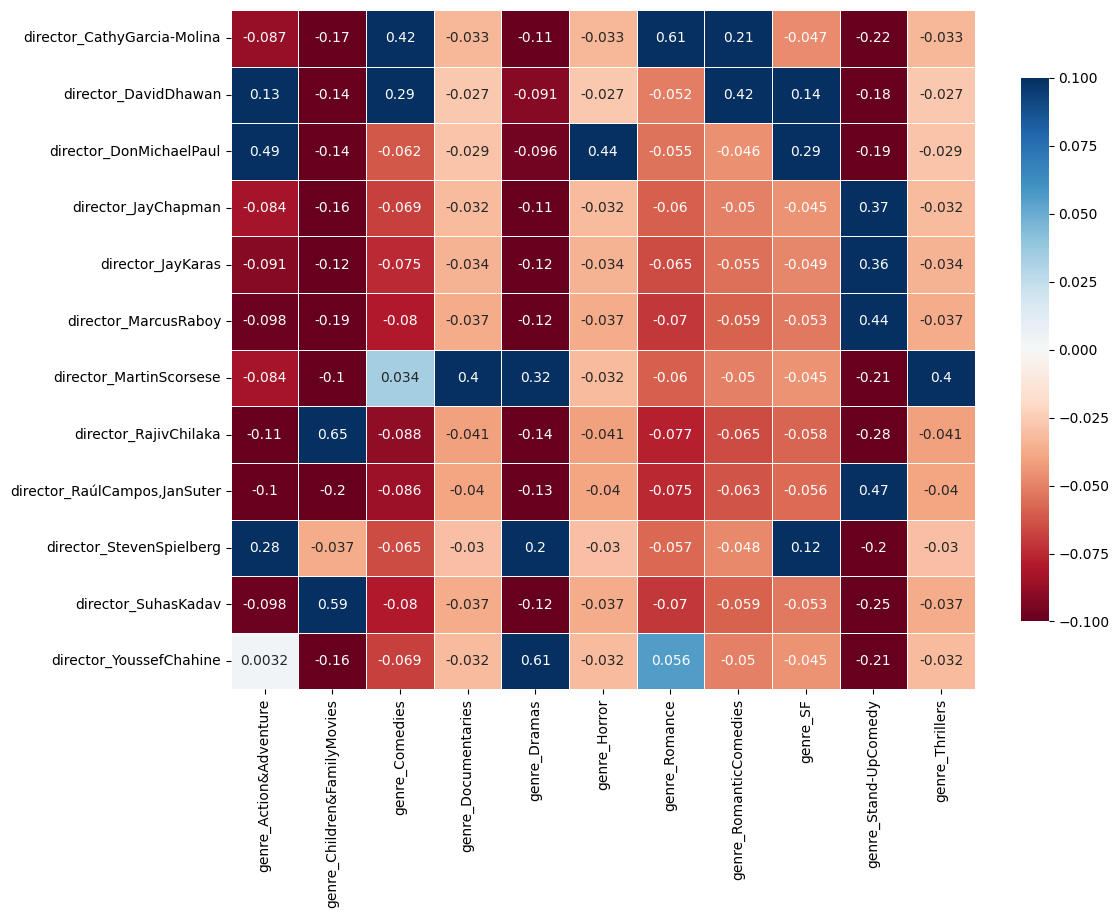

In [220]:
plt.rcParams.update({'figure.dpi':'100',
                    'figure.figsize':[12, 9]})

sns.heatmap(data= corr_df,
           annot = True, # 상관계수 표시
            linewidths = .5,
            vmax = 0.1,
            vmin = -0.1,
            cbar_kws = {"shrink": .8},
           cmap = 'RdBu') 